In [155]:
# Import Packages
import pandas as pd
from pandas import datetime
import matplotlib.pyplot as plt
import numpy as np
import warnings; warnings.simplefilter('ignore')

In [156]:
def parser(s):
    return datetime.strptime(s, "%Y-%m-%d")

In [157]:
# Load Data
data = pd.read_csv('/datc/parcel/notebooks/data/postnl/20201014_300_klanten.csv', parse_dates=[0])

In [158]:
cust_filter = data['cust_id'] == 'klant_69'
date_filter = data['procesdag'].dt.dayofweek <= 4
data = data.where(date_filter & cust_filter).dropna()

data['procesdag']=pd.to_datetime(data['procesdag'])
data = data.set_index(data.procesdag, drop=True)
data = data['2018-01-01':'2020-01-01']

In [159]:
data.drop(['procesdag'], axis='columns', inplace=True)
data.drop(['aantal_pakketten_volgende_dag'], axis='columns', inplace=True)

In [160]:
data.head()

,cust_id,aantal_pakketten,validation_column
procesdag,,,
2018-01-01,klant_69,490.0,train
2018-01-02,klant_69,976.0,train
2018-01-03,klant_69,683.0,train
2018-01-04,klant_69,631.0,train
2018-01-05,klant_69,600.0,train


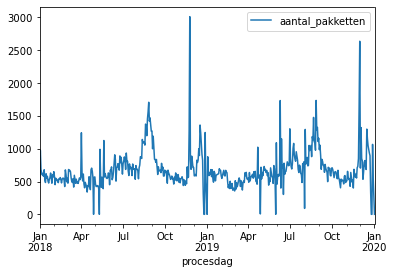

In [161]:
data.plot()

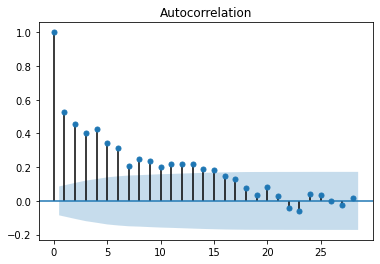

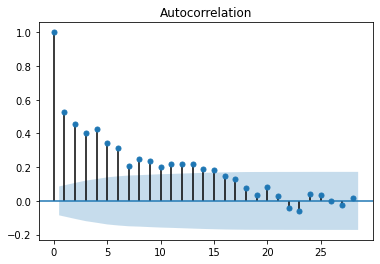

In [162]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data['aantal_pakketten'])

In [163]:
data_diff = data['aantal_pakketten'].diff()

In [164]:
data_diff = data_diff[1:]
data_diff.head()

procesdag
2018-01-02    486.0
2018-01-03   -293.0
2018-01-04    -52.0
2018-01-05    -31.0
2018-01-08     26.0
Name: aantal_pakketten, dtype: float64

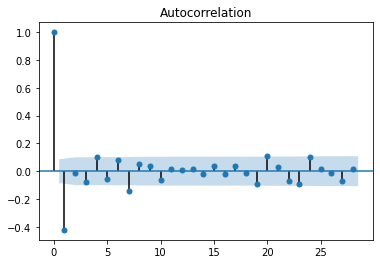

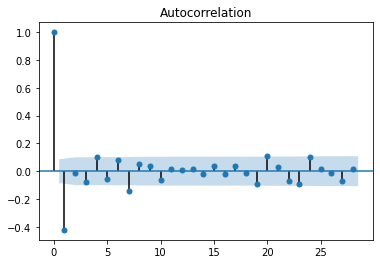

In [165]:
plot_acf(data_diff)

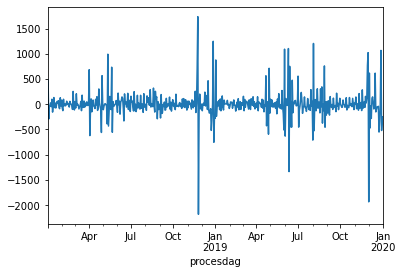

In [166]:
data_diff.plot()

In [167]:
X = data_diff.values
X.size
train = X[0:500] # 500 training data
test = X[500:] # 22 testing data
predictions = []

# AR MODEL

In [168]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
model_ar = AR(train)
model_ar_fit = model_ar.fit()

In [169]:
predictions = model_ar_fit.predict(start=499, end=522)

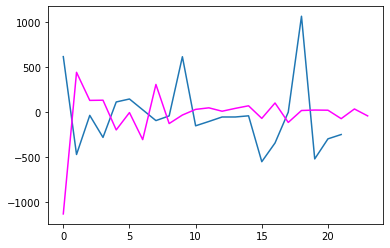

In [170]:
plt.plot(test)
plt.plot(predictions, color='magenta')

# ARIMA MODEL

In [171]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import r2_score

Root Mean Squared Error: 357.5487451682688


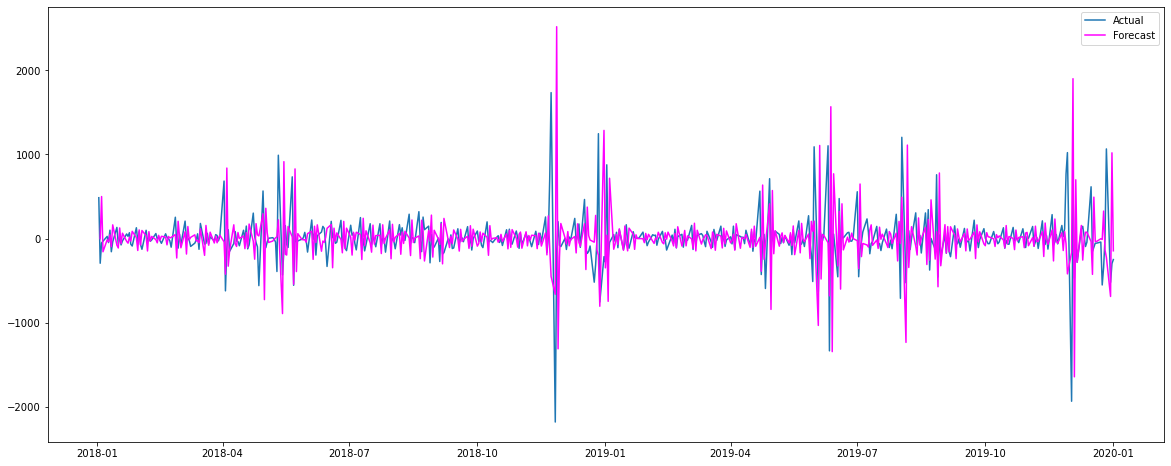

In [172]:
# Fit ARIMA Model
fig = plt.figure(figsize=(20,8))
model = ARIMA(data_diff, order=(1, 1, 0))
ax = plt.gca()
results = model.fit()
plt.plot(data_diff)
plt.plot(results.fittedvalues, color='magenta', alpha=1)
ax.legend(['Actual', 'Forecast'])
residuals = data_diff - results.fittedvalues
print('Root Mean Squared Error:', np.sqrt(np.mean(residuals**2)))

Root Mean Squared Error: 357.5487451682688


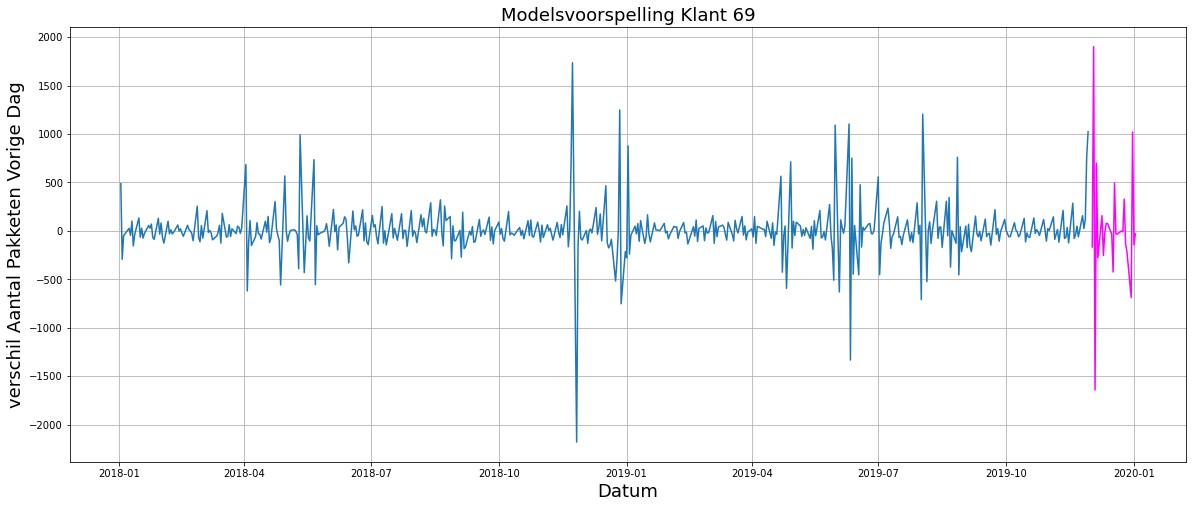

In [173]:
fig = plt.figure(figsize=(20,8))
num_points = len(data_diff)
x = results.predict(start=(499), end=(522), dynamic=False)

plt.plot(data_diff[:499])
plt.plot(x, color='magenta')
plt.xlabel('Datum',fontsize= 18)
plt.ylabel('verschil Aantal Pakketen Vorige Dag',fontsize= 18)
plt.title('Modelsvoorspelling Klant 69',fontsize= 18)
plt.grid()
residuals = data_diff - results.fittedvalues
print('Root Mean Squared Error:', np.sqrt(np.mean(residuals**2)))

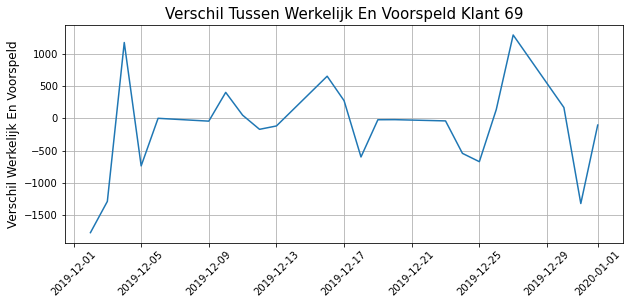

In [174]:
diff = data_diff - x
plt.figure(figsize=(10,4))
plt.plot(diff)
plt.ylabel('Verschil Werkelijk En Voorspeld', fontsize=12)
plt.title('Verschil Tussen Werkelijk En Voorspeld Klant 69', fontsize=15)
plt.xticks(rotation=45)
plt.grid()

Root Mean Squared Error: 357.5487451682688
-0.8195822709827241


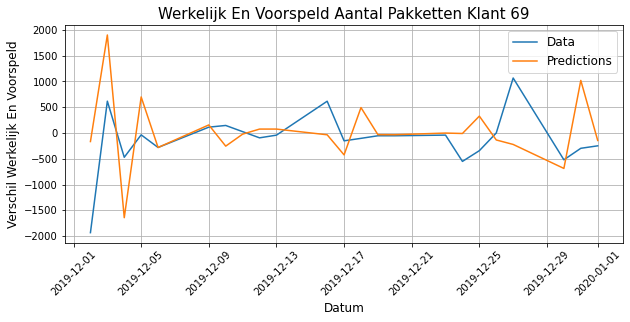

In [181]:
plt.figure(figsize=(10,4))
plt.plot(data_diff[499:])
plt.plot(x[:-1])
plt.legend(('Data', 'Predictions'), fontsize=12)
plt.xlabel('Datum', fontsize=12)
plt.ylabel('Verschil Werkelijk En Voorspeld', fontsize=12)
plt.title('Werkelijk En Voorspeld Aantal Pakketten Klant 69', fontsize=15)
plt.xticks(rotation=45)
plt.grid()
print('Root Mean Squared Error:', np.sqrt(np.mean(residuals**2)))
from sklearn.metrics import r2_score
print(r2_score(data_diff[499:], x[:-1]))